Columns: Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')
Total Revenue: 137348768.31
Total Orders: 100
Average Order Value: 1373487.6831


/tmp/ipython-input-558448195.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Revenue'].sum()


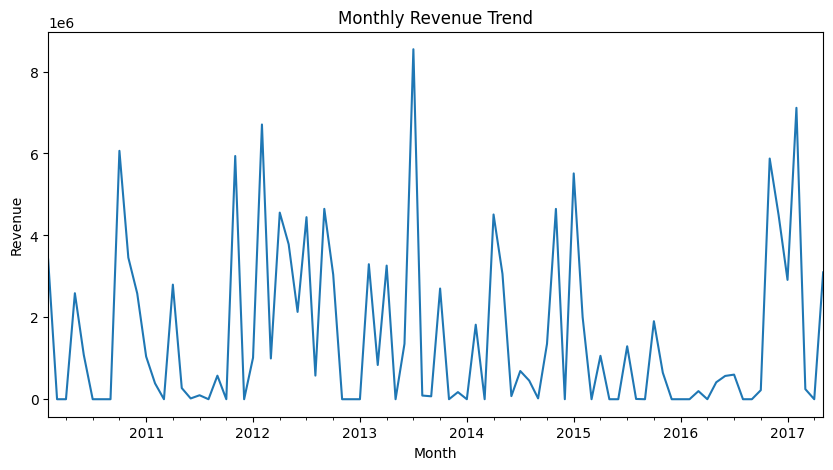

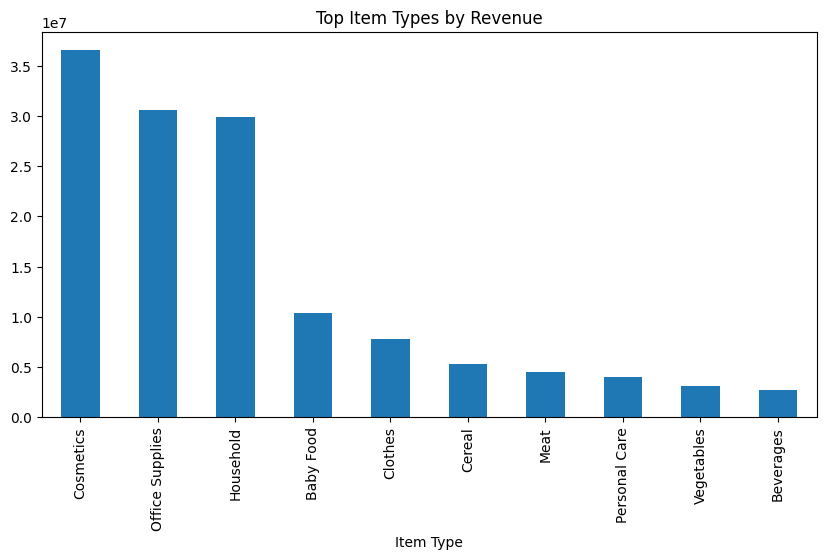

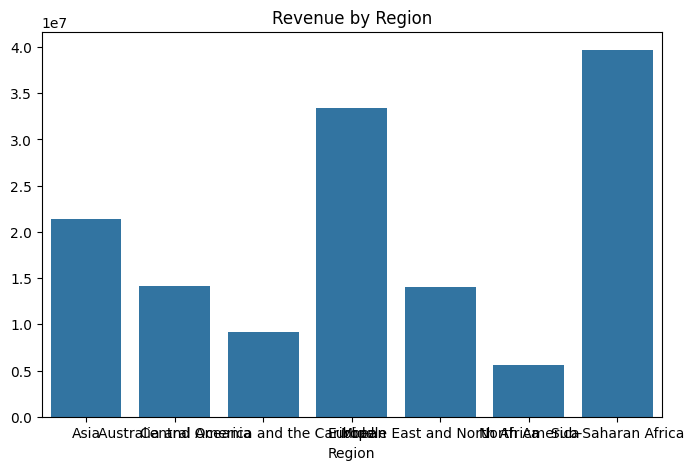

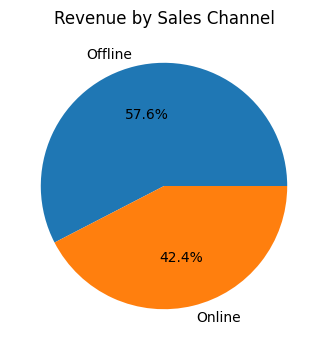

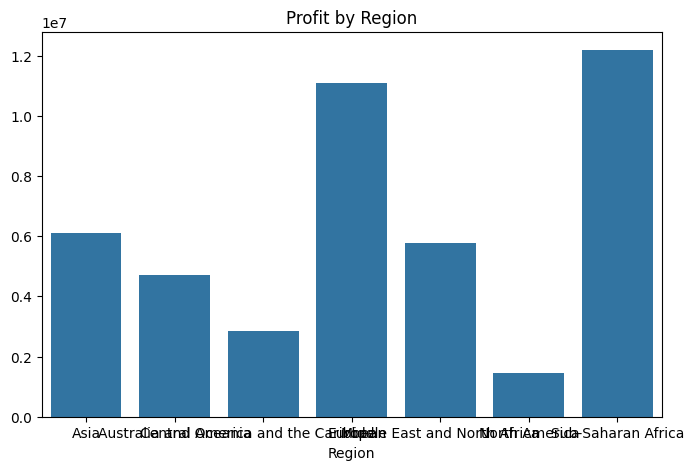

✅ Analysis Complete – Add Insights in Markdown Cell


In [ ]:
# ===============================
# 1. IMPORT LIBRARIES
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 2. LOAD DATASET
# ===============================
df = pd.read_csv("/content/sales.csv")

print("Columns:", df.columns)

# ===============================
# 3. DATA CLEANING
# ===============================
df.dropna(inplace=True)

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Use existing revenue column
df['Revenue'] = df['Total Revenue']

# ===============================
# 4. KPI CALCULATIONS
# ===============================
total_revenue = df['Revenue'].sum()
total_orders = df['Order ID'].nunique()
average_order_value = total_revenue / total_orders

print("Total Revenue:", total_revenue)
print("Total Orders:", total_orders)
print("Average Order Value:", average_order_value)

# ===============================
# 5. MONTHLY REVENUE TREND
# ===============================
monthly_sales = df.resample('M', on='Order Date')['Revenue'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

# ===============================
# 6. TOP 10 ITEM TYPES
# ===============================
top_products = df.groupby('Item Type')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title("Top Item Types by Revenue")
plt.show()

# ===============================
# 7. REGION PERFORMANCE
# ===============================
region_sales = df.groupby('Region')['Revenue'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Revenue by Region")
plt.show()

# ===============================
# 8. SALES CHANNEL ANALYSIS
# ===============================
channel_sales = df.groupby('Sales Channel')['Revenue'].sum()

plt.figure(figsize=(6,4))
channel_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Revenue by Sales Channel")
plt.ylabel("")
plt.show()

# ===============================
# 9. PROFIT ANALYSIS
# ===============================
profit_by_region = df.groupby('Region')['Total Profit'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=profit_by_region.index, y=profit_by_region.values)
plt.title("Profit by Region")
plt.show()

print("✅ Analysis Complete – Add Insights in Markdown Cell")